<a href="https://colab.research.google.com/github/Whaleman0423/Deep_Learning_model/blob/main/Inception_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inception module :

In [1]:
def inception(x, nb_filter):   # x => np.array ,  nb_filter => 要幾個 filter
  branch_1x1 = Conv2D(nb_filter, (1,1), padding='same', activation='relu')(x)

  branch_3x3 = Conv2D(nb_filter, (1,1), padding='same', activation='relu')(x)
  branch_3x3 = Conv2D(nb_filter, (3,3), padding='same', activation='relu')(branch_3x3)

  branch_5x5 = Conv2D(nb_filter, (1,1), padding='same', activation='relu')(x)
  branch_5x5 = Conv2D(nb_filter, (5,5), padding='same', activation='relu')(branch_5x5)

  branch_pool = MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='same')(x)
  branch_pool = Conv2D(nb_filter, (1,1), padding='same', activation="relu")(branch_pool)

  x = concatenate([branch_1x1, branch_3x3, branch5x5, branch_pool], axis=-1)

  return x

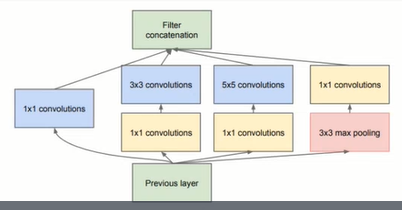

In [2]:
inputs = Input(shape=(224, 224, 3))
x = Conv2D(64, (7,7), padding='same', strides=(2,2), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='ssame')(x)
x = Conv2D(192, (3,3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)
x = inception(x, 64)
x = inception(x, 120)
x = MaxPooling2D(pool_size=(3,3), strides=(2,2),padding='same')(x)
x = inception(x, 128)
x = inception(x, 128)
x = inception(x, 128)
x = inception(x, 132)
x = inception(x, 208)
x = MaxPooling2D(pool_size=(3,3), strides(2,2), padding='same')(x)
x = inception(x, 208)
x = inception(x, 256)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
x = Dense(1000, activation='relu')(x)
x = Dense(1000, activation='softmax')(x)
model = Model(inputs, x)

NameError: ignored